In [1]:
import shap
import pickle
import pandas as pd, numpy as np
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn_pandas import DataFrameMapper

import matplotlib.pyplot as plt

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/matplotlib/__init__.py:1038: UserWarning: Bad val "TkAggX" on line #1
	"backend: TkAggX
"
	in file "/Users/costefan/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string 'tkaggx': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
  (val, error_details, msg))


In [2]:
model = pickle.load(open('../models/finalized_model_scoring.sav', 'rb'))

In [3]:
clean_data = pd.read_csv('clean_data.csv', infer_datetime_format = True)

In [4]:
numerical_cols=['sub_grade_num', 'short_emp', 'emp_length_num','dti', 'payment_inc_ratio', 'delinq_2yrs', \
                'delinq_2yrs_zero', 'inq_last_6mths', 'last_delinq_none', 'last_major_derog_none', 'open_acc',\
                'pub_rec', 'pub_rec_zero','revol_util']

categorical_cols=['grade', 'home_ownership', 'purpose']

mapper = DataFrameMapper([
    ('grade',sklearn.preprocessing.LabelBinarizer()),
    ('home_ownership', sklearn.preprocessing.LabelBinarizer()),
    ('purpose', sklearn.preprocessing.LabelBinarizer()),],
df_out=True)

X1 = mapper.fit_transform(clean_data)

df = pd.concat([X1, clean_data[numerical_cols]])

X2 = np.array(clean_data[numerical_cols])


X = np.hstack((X1,X2)) #Combines X1 and X2 side by side, i.e. stacks them horizontally
y = np.array(clean_data['bad_loans'])

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100, stratify=y)

In [6]:
model.score(X_test, y_test)

0.8111542359892215

## classical random forest feature importance

Pros:
* fast calculation
* easy to retrieve — one command <br />


Cons:
* biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables

In [7]:
model.feature_importances_

array([2.30887870e-01, 9.23425995e-02, 8.80143299e-03, 6.71423099e-02,
       6.52184085e-02, 6.94255912e-02, 1.75002609e-02, 9.29970882e-03,
       4.61089460e-04, 7.30520481e-05, 6.59183503e-03, 0.00000000e+00,
       7.66032573e-03, 1.83003484e-04, 0.00000000e+00, 3.91641092e-04,
       6.17269512e-04, 0.00000000e+00, 8.00274918e-04, 2.31970742e-03,
       1.14397190e-02, 1.96806286e-04, 3.25496911e-05, 5.77436537e-03,
       1.55627958e-03, 7.22090016e-03, 1.14436382e-01, 1.65930638e-01,
       8.34654432e-04, 1.96921753e-03, 1.94803424e-02, 5.44442990e-03,
       1.67277854e-03, 4.98577687e-03, 2.17311770e-03, 2.01855370e-03,
       7.51171082e-02])

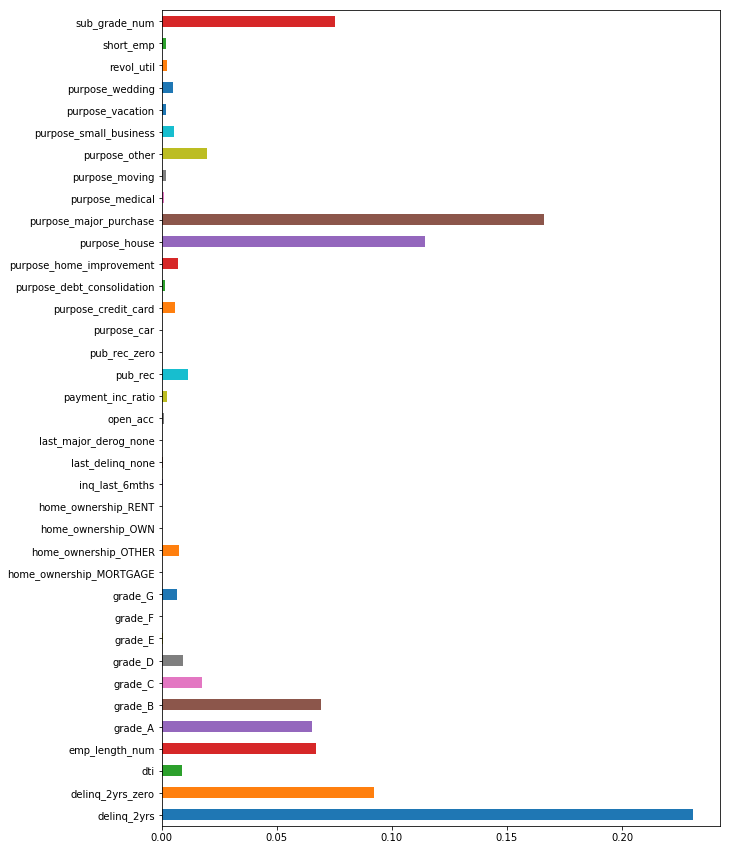

In [8]:
plt.figure(figsize=(10, 15))
pd.Series(model.feature_importances_, index=df.columns).plot(kind='barh')

## Shap tool

In [9]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [21]:
subsample = X[:20]

In [22]:
explainer = shap.KernelExplainer(model.predict_proba, subsample)
shap_values = explainer.shap_values(subsample)

  0%|          | 0/20 [00:00<?, ?it/s]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  5%|▌         | 1/20 [00:00<00:04,  3.88it/s]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in th

 55%|█████▌    | 11/20 [00:03<00:02,  3.22it/s]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 60%|██████    | 12/20 [00:03<00:02,  3.18it/s]/Users/costefan/.pyenv/versions/anaconda3-4.3.0/envs/ucu/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated

            'grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used

In [23]:
shap.force_plot(explainer.expected_value[0], shap_values[0], subsample, feature_names=df.columns)

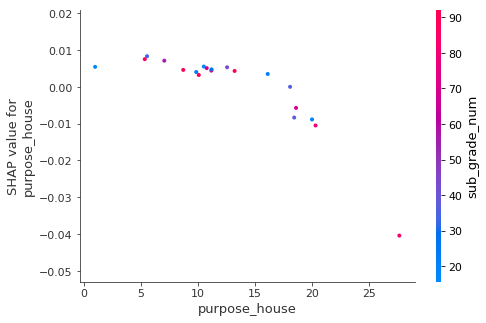

In [25]:
shap.dependence_plot('purpose_house', shap_values[0], subsample, feature_names=df.columns)

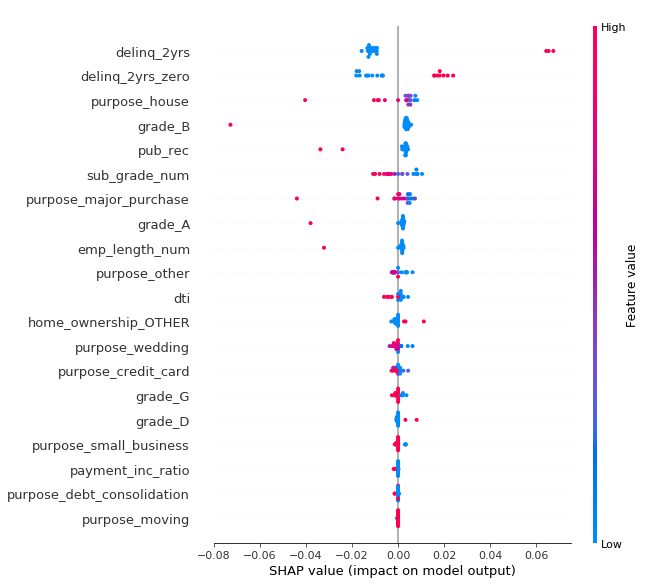

In [26]:
# summarize the effects of all the features
shap.summary_plot( shap_values[0], subsample, feature_names=df.columns)